In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import urllib.request

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [3]:
df1 = pd.read_csv('Capstone Project - Income Data.csv') #reads in Income Data CSV file as a dataframe
df1 = df1[pd.notnull(df1['Postcode'])] #removes all cases where Postcode is null
df1.drop(df1.tail(1).index,inplace=True) #removes last row, the total row, leaving 23 postcodes
df1.drop(df1.columns[[14]], axis=1, inplace=True) #removes last empty column
df1.columns = ['Postcode', 'Negative income', 'Nil income', '1-199', '200-299', '300-399','400-599','600-799','800-999','1,000-1,249','1,250-1,499','1,500-1,999','2,000 or more', 'X']
del df1['X'] #removes column x
df1[['Postcode','Territory']] = df1.Postcode.str.split(",",expand=True,) #splits Postcode column into Postcode and Territory columns
df1 = df1[['Postcode', 'Territory', 'Negative income', 'Nil income', '1-199', '200-299', '300-399','400-599','600-799','800-999','1,000-1,249','1,250-1,499','1,500-1,999','2,000 or more']] #custom reordering of columns
df1 #displays dataframe

,Postcode,Territory,Negative income,Nil income,1-199,200-299,300-399,400-599,600-799,800-999,"1,000-1,249","1,250-1,499","1,500-1,999","2,000 or more"
0,2600,ACT,0.00,0.07,0.06,0.04,0.04,0.06,0.07,0.07,0.10,0.09,0.13,0.27
1,2603,ACT,0.00,0.07,0.06,0.05,0.07,0.06,0.06,0.07,0.09,0.08,0.13,0.25
2,2605,ACT,0.00,0.07,0.07,0.06,0.07,0.08,0.08,0.08,0.10,0.09,0.13,0.19
3,2604,ACT,0.00,0.05,0.05,0.05,0.06,0.07,0.07,0.07,0.11,0.11,0.16,0.19
4,2914,ACT,0.00,0.08,0.07,0.04,0.03,0.06,0.07,0.08,0.12,0.12,0.18,0.15
5,2607,ACT,0.00,0.07,0.07,0.06,0.07,0.09,0.09,0.09,0.10,0.09,0.13,0.15
6,2612,ACT,0.00,0.05,0.06,0.06,0.06,0.10,0.09,0.09,0.11,0.10,0.13,0.14
7,2602,ACT,0.00,0.06,0.06,0.07,0.08,0.10,0.08,0.08,0.10,0.09,0.14,0.14
8,2611,ACT,0.00,0.06,0.07,0.06,0.07,0.09,0.10,0.09,0.11,0.09,0.14,0.13
9,2614,ACT,0.00,0.06,0.07,0.07,0.07,0.10,0.09,0.08,0.10,0.09,0.13,0.13


In [4]:
df1.Postcode = df1.Postcode.astype(np.int) #converts the postcode col from an object dtype to an int32 dtype
df1.dtypes #provides overview of data types within dataframe

Postcode             int32
Territory           object
Negative income    float64
Nil income         float64
1-199              float64
200-299            float64
300-399            float64
400-599            float64
600-799            float64
800-999            float64
1,000-1,249        float64
1,250-1,499        float64
1,500-1,999        float64
2,000 or more      float64
dtype: object

In [5]:
df1.shape #provides overview of data shape of dataframe

(24, 14)

In [6]:
df2 = pd.read_csv('Capstone Project - Age Data.csv') #reads in Age Data CSV file as a dataframe
df2 = df2[pd.notnull(df2['Postcode'])] #removes all cases where Postcode is null
df2.drop(df2.tail(1).index,inplace=True) #removes last row, the total row, leaving 23 postcodes
df2[['Postcode','Territory']] = df2.Postcode.str.split(",",expand=True,) #splits Postcode column into Postcode and Territory columns
list(df2) #print list of dataframe column names


['Postcode',
 '0-4 years',
 '5-9 years',
 '10-14 years',
 '15-19 years',
 '20-24 years',
 '25-29 years',
 '30-34 years',
 '35-39 years',
 '40-44 years',
 '45-49 years',
 '50-54 years',
 '55-59 years',
 '60-64 years',
 '65-69 years',
 '70-74 years',
 '75-79 years',
 '80-84 years',
 '85-89 years',
 '90-94 years',
 '95-99 years',
 '100 years and over',
 'Territory']

In [7]:
df2.head()

,Postcode,0-4 years,5-9 years,10-14 years,15-19 years,20-24 years,25-29 years,30-34 years,35-39 years,40-44 years,45-49 years,50-54 years,55-59 years,60-64 years,65-69 years,70-74 years,75-79 years,80-84 years,85-89 years,90-94 years,95-99 years,100 years and over,Territory
0,2600,0.04,0.05,0.05,0.06,0.06,0.07,0.05,0.05,0.07,0.07,0.08,0.07,0.08,0.05,0.04,0.03,0.03,0.02,0.01,0.0,0.0,ACT
1,2603,0.04,0.05,0.06,0.07,0.07,0.08,0.06,0.05,0.07,0.08,0.08,0.07,0.06,0.04,0.03,0.02,0.02,0.02,0.01,0.0,0.0,ACT
2,2605,0.05,0.06,0.07,0.06,0.06,0.05,0.05,0.07,0.08,0.08,0.08,0.06,0.05,0.04,0.05,0.04,0.03,0.02,0.01,0.0,0.0,ACT
3,2604,0.05,0.04,0.05,0.05,0.07,0.13,0.09,0.08,0.08,0.07,0.07,0.06,0.04,0.03,0.02,0.02,0.02,0.02,0.01,0.0,0.0,ACT
4,2914,0.12,0.10,0.08,0.06,0.05,0.08,0.11,0.12,0.09,0.06,0.04,0.03,0.02,0.01,0.01,0.00,0.00,0.00,0.00,0.0,0.0,ACT


In [8]:
df2 = df2[['Postcode', 'Territory',
 '0-4 years',
 '5-9 years',
 '10-14 years',
 '15-19 years',
 '20-24 years',
 '25-29 years',
 '30-34 years',
 '35-39 years',
 '40-44 years',
 '45-49 years',
 '50-54 years',
 '55-59 years',
 '60-64 years',
 '65-69 years',
 '70-74 years',
 '75-79 years',
 '80-84 years',
 '85-89 years',
 '90-94 years',
 '95-99 years',
 '100 years and over']] # custom reordering of columns
df2.Postcode = df2.Postcode.astype(np.int) #converts the postcode col from an object dtype to an int32 dtype
df2 #displays reordered dataframe

,Postcode,Territory,0-4 years,5-9 years,10-14 years,15-19 years,20-24 years,25-29 years,30-34 years,35-39 years,40-44 years,45-49 years,50-54 years,55-59 years,60-64 years,65-69 years,70-74 years,75-79 years,80-84 years,85-89 years,90-94 years,95-99 years,100 years and over
0,2600,ACT,0.04,0.05,0.05,0.06,0.06,0.07,0.05,0.05,0.07,0.07,0.08,0.07,0.08,0.05,0.04,0.03,0.03,0.02,0.01,0.0,0.0
1,2603,ACT,0.04,0.05,0.06,0.07,0.07,0.08,0.06,0.05,0.07,0.08,0.08,0.07,0.06,0.04,0.03,0.02,0.02,0.02,0.01,0.0,0.0
2,2605,ACT,0.05,0.06,0.07,0.06,0.06,0.05,0.05,0.07,0.08,0.08,0.08,0.06,0.05,0.04,0.05,0.04,0.03,0.02,0.01,0.0,0.0
3,2604,ACT,0.05,0.04,0.05,0.05,0.07,0.13,0.09,0.08,0.08,0.07,0.07,0.06,0.04,0.03,0.02,0.02,0.02,0.02,0.01,0.0,0.0
4,2914,ACT,0.12,0.10,0.08,0.06,0.05,0.08,0.11,0.12,0.09,0.06,0.04,0.03,0.02,0.01,0.01,0.00,0.00,0.00,0.00,0.0,0.0
5,2607,ACT,0.05,0.05,0.06,0.07,0.06,0.06,0.05,0.06,0.07,0.08,0.07,0.06,0.06,0.06,0.05,0.04,0.03,0.02,0.01,0.0,0.0
6,2612,ACT,0.03,0.03,0.03,0.07,0.18,0.17,0.10,0.06,0.06,0.05,0.05,0.04,0.04,0.03,0.02,0.02,0.01,0.01,0.00,0.0,0.0
7,2602,ACT,0.06,0.05,0.05,0.05,0.09,0.10,0.08,0.08,0.08,0.07,0.07,0.06,0.04,0.03,0.03,0.03,0.02,0.02,0.01,0.0,0.0
8,2611,ACT,0.07,0.06,0.06,0.06,0.05,0.06,0.06,0.08,0.08,0.07,0.06,0.06,0.07,0.06,0.04,0.03,0.02,0.01,0.01,0.0,0.0
9,2614,ACT,0.07,0.06,0.05,0.06,0.07,0.07,0.07,0.07,0.07,0.06,0.06,0.05,0.06,0.06,0.04,0.03,0.03,0.02,0.01,0.0,0.0


In [9]:
df3 = pd.read_csv('Capstone Project - Geospatial Data.csv') #reads in Geospatial Data CSV file as a dataframe, credit to http://www.corra.com.au/australian-postcode-location-data/ for developing the dataset
df3.head() #as this data file is very long (16,080 cases), only the head is displayed

,postcode,suburb,state,dc,type,lat,lon
0,200,AUSTRALIAN NATIONAL UNIVERSITY,ACT,AUSTRALIAN NATIONAL UNI LPO,Post Office Boxes,-35.277272,149.117136
1,221,BARTON,ACT,NaN,LVR,-35.201372,149.095065
2,800,DARWIN,NT,DARWIN DELIVERY CENTRE,Delivery Area,-12.801028,130.955789
3,801,DARWIN,NT,DARWIN DELIVERY CENTRE,Post Office Boxes,-12.801028,130.955789
4,804,PARAP,NT,PARAP,Post Office Boxes,-12.432181,130.843310


In [10]:
df3.postcode = df3.postcode.astype(np.int) #converts the postcode col from an object dtype to an int32 dtype, as pd merge does not work on objects
df3.dtypes

postcode      int32
suburb       object
state        object
dc           object
type         object
lat         float64
lon         float64
dtype: object

In [11]:
df3.shape

(16080, 7)

In [12]:
df4 = pd.merge(df1, df3, left_on = 'Postcode', right_on = 'postcode', how='left') #inner join on Postcode
df4 = df4[pd.notnull(df4['Postcode'])] #removes all cases where Postcode is null
df4 = df4.drop(['postcode', 'state', 'dc', 'type', 'suburb'], axis=1) #drop excess cols
df4 = df4.drop_duplicates(subset='Postcode', keep='first') #remove duplicate Postcode cases
df4 = df4.reset_index(drop=True) #reset index
df4

,Postcode,Territory,Negative income,Nil income,1-199,200-299,300-399,400-599,600-799,800-999,"1,000-1,249","1,250-1,499","1,500-1,999","2,000 or more",lat,lon
0,2600,ACT,0.00,0.07,0.06,0.04,0.04,0.06,0.07,0.07,0.10,0.09,0.13,0.27,-35.314348,149.137033
1,2603,ACT,0.00,0.07,0.06,0.05,0.07,0.06,0.06,0.07,0.09,0.08,0.13,0.25,-35.318480,149.124096
2,2605,ACT,0.00,0.07,0.07,0.06,0.07,0.08,0.08,0.08,0.10,0.09,0.13,0.19,-35.324540,149.075667
3,2604,ACT,0.00,0.05,0.05,0.05,0.06,0.07,0.07,0.07,0.11,0.11,0.16,0.19,-35.317703,149.150133
4,2914,ACT,0.00,0.08,0.07,0.04,0.03,0.06,0.07,0.08,0.12,0.12,0.18,0.15,-35.170334,149.125877
5,2607,ACT,0.00,0.07,0.07,0.06,0.07,0.09,0.09,0.09,0.10,0.09,0.13,0.15,-35.375443,149.100950
6,2612,ACT,0.00,0.05,0.06,0.06,0.06,0.10,0.09,0.09,0.11,0.10,0.13,0.14,-35.270615,149.133208
7,2602,ACT,0.00,0.06,0.06,0.07,0.08,0.10,0.08,0.08,0.10,0.09,0.14,0.14,-35.262153,149.145893
8,2611,ACT,0.00,0.06,0.07,0.06,0.07,0.09,0.10,0.09,0.11,0.09,0.14,0.13,-35.560416,148.624957
9,2614,ACT,0.00,0.06,0.07,0.07,0.07,0.10,0.09,0.08,0.10,0.09,0.13,0.13,-35.257964,149.075648


In [13]:
df4.describe()

,Postcode,Negative income,Nil income,1-199,200-299,300-399,400-599,600-799,800-999,"1,000-1,249","1,250-1,499","1,500-1,999","2,000 or more",lat,lon
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,2732.333333,0.001667,0.073750,0.068333,0.062500,0.062917,0.086250,0.087917,0.087500,0.110417,0.097500,0.132083,0.130000,-35.335085,149.083398
std,150.885118,0.003807,0.037278,0.021803,0.019393,0.020319,0.020176,0.018411,0.017508,0.017565,0.021919,0.027972,0.052087,0.105650,0.104400
min,2600.000000,0.000000,0.050000,0.040000,0.030000,0.020000,0.050000,0.040000,0.030000,0.050000,0.050000,0.050000,0.050000,-35.560416,148.624957
25%,2605.750000,0.000000,0.060000,0.060000,0.050000,0.060000,0.077500,0.077500,0.080000,0.100000,0.090000,0.130000,0.100000,-35.401501,149.075662
50%,2614.500000,0.000000,0.070000,0.070000,0.060000,0.065000,0.090000,0.090000,0.090000,0.110000,0.100000,0.130000,0.125000,-35.318092,149.099079
75%,2904.250000,0.000000,0.070000,0.070000,0.070000,0.070000,0.090000,0.100000,0.092500,0.120000,0.102500,0.140000,0.142500,-35.261106,149.127495
max,2914.000000,0.010000,0.240000,0.160000,0.120000,0.130000,0.150000,0.130000,0.120000,0.140000,0.160000,0.180000,0.270000,-35.170334,149.194007


In [14]:
df4.dtypes

Postcode             int32
Territory           object
Negative income    float64
Nil income         float64
1-199              float64
200-299            float64
300-399            float64
400-599            float64
600-799            float64
800-999            float64
1,000-1,249        float64
1,250-1,499        float64
1,500-1,999        float64
2,000 or more      float64
lat                float64
lon                float64
dtype: object

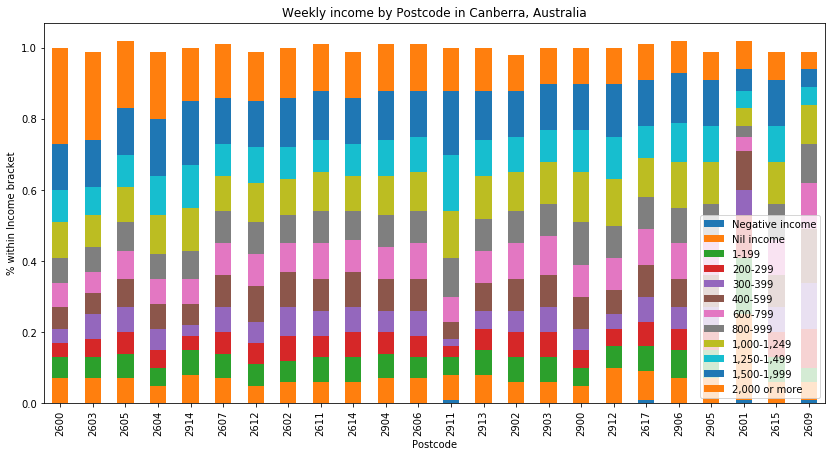

In [15]:
# prepare dataframe for stackedcol
df4_stackedcol = df4 #create dataframe for stackedcol graph
df4_stackedcol = df4_stackedcol.drop(['lat', 'lon'], axis=1) #drop excess cols
df4_stackedcol.round(3)
df4_stackedcol = df4_stackedcol.set_index(['Postcode'])
df4_stackedcol.sort_values('2,000 or more')

df4_stackedcol.head()

# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rc
import pandas as pd

# make plot outputs appear and be stored within notebook
%matplotlib inline
 
my_plot = df4_stackedcol.plot(kind='bar',stacked=True,title="Weekly income by Postcode in Canberra, Australia", figsize=(14,7))
my_plot.set_xlabel("Postcode")
my_plot.set_ylabel("% within Income bracket")
my_plot.legend(loc='lower right',ncol=1)

In [16]:
df5 = pd.merge(df2, df3, left_on = 'Postcode', right_on = 'postcode', how='left') #inner join on Postcode
df5 = df5[pd.notnull(df5['Postcode'])] #removes all cases where Postcode is null
df5 = df5.drop(['postcode', 'state', 'dc', 'type', 'suburb'], axis=1) #drop excess cols
df5 = df5.drop_duplicates(subset='Postcode', keep='first') #remove duplicate Postcode cases
df5 = df5.reset_index(drop=True) #reset index
df5

,Postcode,Territory,0-4 years,5-9 years,10-14 years,15-19 years,20-24 years,25-29 years,30-34 years,35-39 years,40-44 years,45-49 years,50-54 years,55-59 years,60-64 years,65-69 years,70-74 years,75-79 years,80-84 years,85-89 years,90-94 years,95-99 years,100 years and over,lat,lon
0,2600,ACT,0.04,0.05,0.05,0.06,0.06,0.07,0.05,0.05,0.07,0.07,0.08,0.07,0.08,0.05,0.04,0.03,0.03,0.02,0.01,0.0,0.0,-35.314348,149.137033
1,2603,ACT,0.04,0.05,0.06,0.07,0.07,0.08,0.06,0.05,0.07,0.08,0.08,0.07,0.06,0.04,0.03,0.02,0.02,0.02,0.01,0.0,0.0,-35.318480,149.124096
2,2605,ACT,0.05,0.06,0.07,0.06,0.06,0.05,0.05,0.07,0.08,0.08,0.08,0.06,0.05,0.04,0.05,0.04,0.03,0.02,0.01,0.0,0.0,-35.324540,149.075667
3,2604,ACT,0.05,0.04,0.05,0.05,0.07,0.13,0.09,0.08,0.08,0.07,0.07,0.06,0.04,0.03,0.02,0.02,0.02,0.02,0.01,0.0,0.0,-35.317703,149.150133
4,2914,ACT,0.12,0.10,0.08,0.06,0.05,0.08,0.11,0.12,0.09,0.06,0.04,0.03,0.02,0.01,0.01,0.00,0.00,0.00,0.00,0.0,0.0,-35.170334,149.125877
5,2607,ACT,0.05,0.05,0.06,0.07,0.06,0.06,0.05,0.06,0.07,0.08,0.07,0.06,0.06,0.06,0.05,0.04,0.03,0.02,0.01,0.0,0.0,-35.375443,149.100950
6,2612,ACT,0.03,0.03,0.03,0.07,0.18,0.17,0.10,0.06,0.06,0.05,0.05,0.04,0.04,0.03,0.02,0.02,0.01,0.01,0.00,0.0,0.0,-35.270615,149.133208
7,2602,ACT,0.06,0.05,0.05,0.05,0.09,0.10,0.08,0.08,0.08,0.07,0.07,0.06,0.04,0.03,0.03,0.03,0.02,0.02,0.01,0.0,0.0,-35.262153,149.145893
8,2611,ACT,0.07,0.06,0.06,0.06,0.05,0.06,0.06,0.08,0.08,0.07,0.06,0.06,0.07,0.06,0.04,0.03,0.02,0.01,0.01,0.0,0.0,-35.560416,148.624957
9,2614,ACT,0.07,0.06,0.05,0.06,0.07,0.07,0.07,0.07,0.07,0.06,0.06,0.05,0.06,0.06,0.04,0.03,0.03,0.02,0.01,0.0,0.0,-35.257964,149.075648


**Note: Up until this point has been mostly data cleaning and wrangling. Now, we can begin to analyse our datasets.**


In [17]:
df5.describe()

,Postcode,0-4 years,5-9 years,10-14 years,15-19 years,20-24 years,25-29 years,30-34 years,35-39 years,40-44 years,45-49 years,50-54 years,55-59 years,60-64 years,65-69 years,70-74 years,75-79 years,80-84 years,85-89 years,90-94 years,95-99 years,100 years and over,lat,lon
count,24.000000,24.000000,24.000000,24.00000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.0,24.0,24.000000,24.000000
mean,2732.333333,0.062083,0.053750,0.05500,0.067083,0.095833,0.095417,0.080000,0.074167,0.070417,0.067083,0.063333,0.057500,0.050417,0.036250,0.026250,0.020000,0.014167,0.008750,0.003333,0.0,0.0,-35.335085,149.083398
std,150.885118,0.024844,0.019519,0.02043,0.026781,0.077117,0.045107,0.028893,0.018158,0.014885,0.018292,0.017856,0.021315,0.020319,0.018606,0.013772,0.012158,0.009743,0.008502,0.004815,0.0,0.0,0.105650,0.104400
min,2600.000000,0.010000,0.000000,0.01000,0.020000,0.050000,0.040000,0.050000,0.040000,0.020000,0.020000,0.020000,0.010000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,-35.560416,148.624957
25%,2605.750000,0.050000,0.050000,0.05000,0.057500,0.067500,0.067500,0.060000,0.067500,0.067500,0.060000,0.060000,0.050000,0.040000,0.020000,0.020000,0.010000,0.010000,0.000000,0.000000,0.0,0.0,-35.401501,149.075662
50%,2614.500000,0.060000,0.055000,0.06000,0.060000,0.070000,0.080000,0.075000,0.070000,0.070000,0.070000,0.065000,0.060000,0.055000,0.040000,0.020000,0.020000,0.010000,0.010000,0.000000,0.0,0.0,-35.318092,149.099079
75%,2904.250000,0.072500,0.062500,0.07000,0.070000,0.090000,0.115000,0.090000,0.080000,0.080000,0.080000,0.072500,0.070000,0.062500,0.050000,0.040000,0.030000,0.020000,0.020000,0.010000,0.0,0.0,-35.261106,149.127495
max,2914.000000,0.120000,0.100000,0.09000,0.170000,0.430000,0.230000,0.180000,0.120000,0.090000,0.100000,0.100000,0.100000,0.080000,0.080000,0.050000,0.040000,0.030000,0.020000,0.010000,0.0,0.0,-35.170334,149.194007


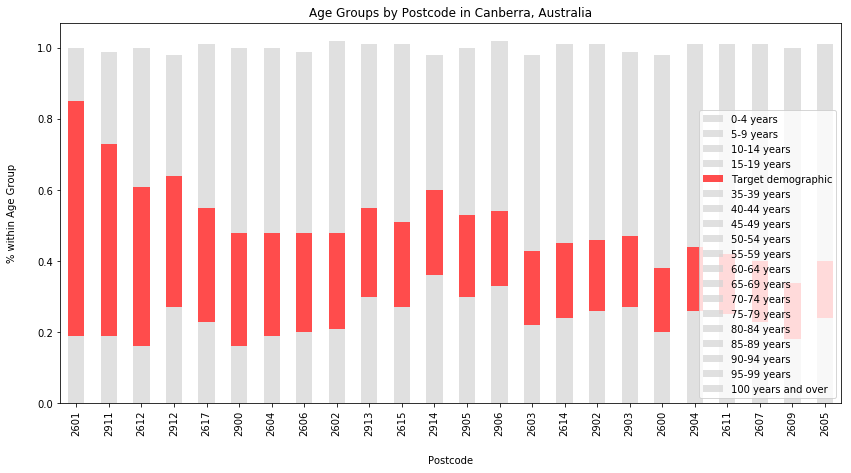

In [18]:
# prepare dataframe for stackedcol
df5_stackedcol = df5 #create dataframe for stackedcol graph
df5_stackedcol = df5_stackedcol.drop(['lat', 'lon'], axis=1) #drop excess cols
df5_stackedcol = df5_stackedcol.set_index(['Postcode'])
df5_stackedcol.round(3)
df5_stackedcol['Target demographic'] = df5_stackedcol['20-24 years'] + df5_stackedcol['25-29 years'] + df5_stackedcol['30-34 years']
df5_stackedcol = df5_stackedcol.drop(['20-24 years','25-29 years','30-34 years'], axis=1) #drop excess cols

df5_stackedcol = df5_stackedcol[['Territory',
 '0-4 years',
 '5-9 years',
 '10-14 years',
 '15-19 years', 'Target demographic',
 '35-39 years',
 '40-44 years',
 '45-49 years',
 '50-54 years',
 '55-59 years',
 '60-64 years',
 '65-69 years',
 '70-74 years',
 '75-79 years',
 '80-84 years',
 '85-89 years',
 '90-94 years',
 '95-99 years',
 '100 years and over']] #custom reordering of columns

df5_stackedcol.sort_values('Target demographic', inplace=True, ascending=False) # sort on target demographic

df5_stackedcol.head()

# libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rc
import pandas as pd

# make plot outputs appear and be stored within notebook
%matplotlib inline
 
pal = ["lightgrey", "lightgrey", "lightgrey", "lightgrey", "r", "lightgrey", "lightgrey", "lightgrey", "lightgrey", "lightgrey", "lightgrey", "lightgrey", "lightgrey", "lightgrey", "lightgrey"]
my_plot = df5_stackedcol.plot(kind='bar',stacked=True,title="Age Groups by Postcode in Canberra, Australia", figsize=(14,7), color=pal, alpha=0.7)
my_plot.set_xlabel("Postcode", labelpad=20)
my_plot.set_ylabel("% within Age Group", labelpad=20)
my_plot.legend(loc='lower right',ncol=1)


In the above plot, three age groups (spanning 20-34 years old) have been combined into a single 'Target demographic' category.

This target demographic has been coloured in red, against all other age groups which ared shaded in grey.

Very clearly, the first three to four postcodes are more likely to contain our target demographic.

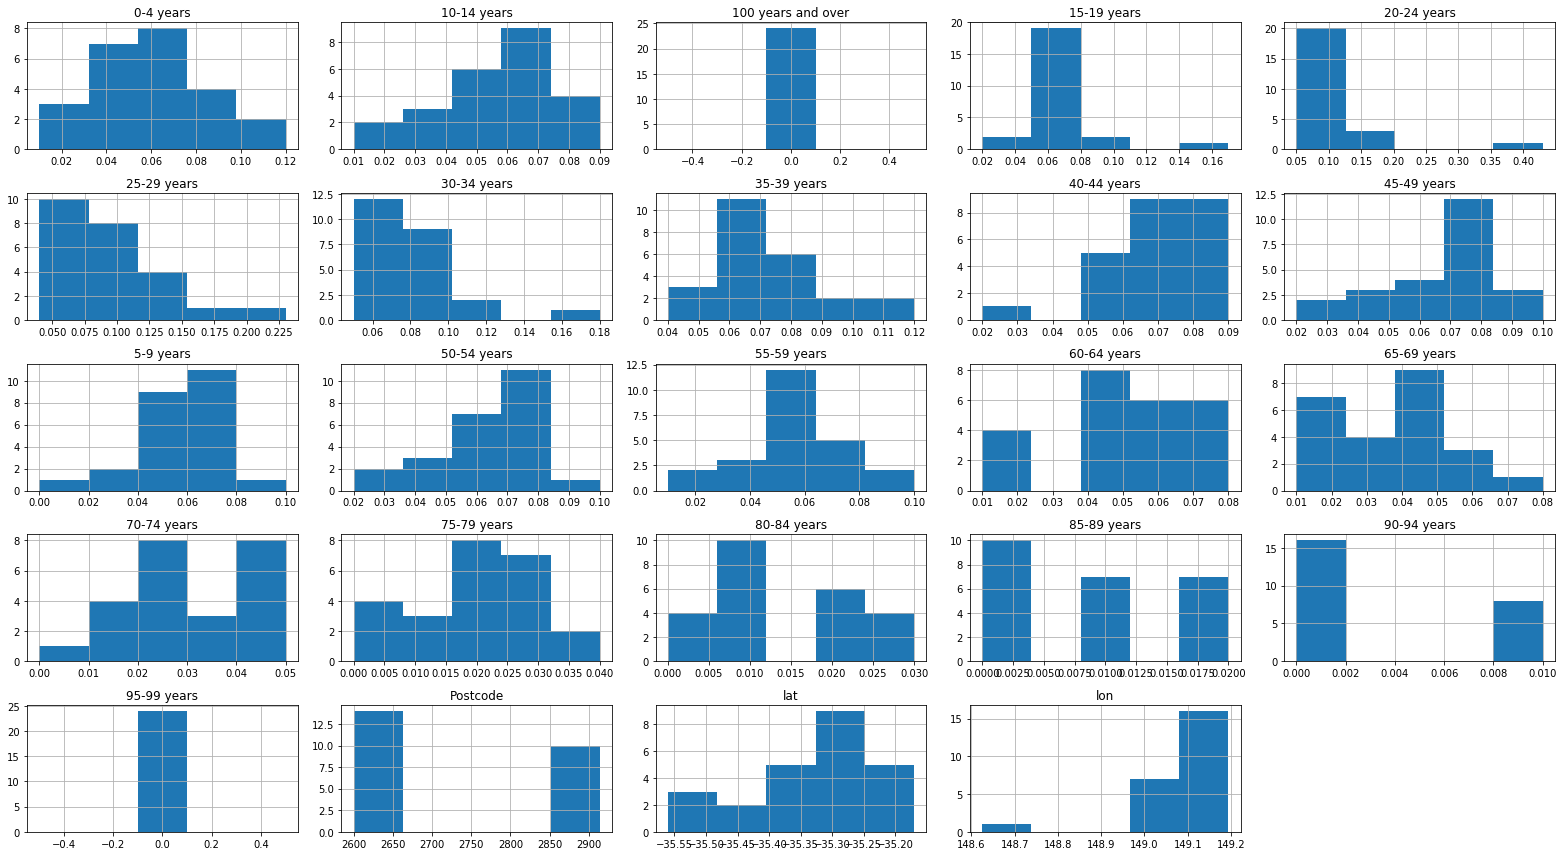

In [19]:
hist = df5.hist(bins=5, figsize=(22,12))
plt.tight_layout()
plt.show()

In [20]:
df5_transposed = df5.transpose()
df5_transposed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Postcode,2600,2603,2605,2604,2914,2607,2612,2602,2611,2614,2904,2606,2911,2913,2902,2903,2900,2912,2617,2906,2905,2601,2615,2609
Territory,ACT,ACT,ACT,ACT,ACT,ACT,ACT,ACT,ACT,ACT,ACT,ACT,ACT,ACT,ACT,ACT,ACT,ACT,ACT,ACT,ACT,ACT,ACT,ACT
0-4 years,0.04,0.04,0.05,0.05,0.12,0.05,0.03,0.06,0.07,0.07,0.05,0.06,0.11,0.08,0.07,0.07,0.05,0.09,0.06,0.08,0.07,0.01,0.08,0.03
5-9 years,0.05,0.05,0.06,0.04,0.1,0.05,0.03,0.05,0.06,0.06,0.06,0.05,0.05,0.07,0.06,0.06,0.04,0.07,0.05,0.07,0.07,0,0.07,0.02
10-14 years,0.05,0.06,0.07,0.05,0.08,0.06,0.03,0.05,0.06,0.05,0.07,0.04,0.01,0.08,0.06,0.06,0.03,0.05,0.05,0.09,0.07,0.01,0.06,0.08
15-19 years,0.06,0.07,0.06,0.05,0.06,0.07,0.07,0.05,0.06,0.06,0.08,0.05,0.02,0.07,0.07,0.08,0.04,0.06,0.07,0.09,0.09,0.17,0.06,0.05
20-24 years,0.06,0.07,0.06,0.07,0.05,0.06,0.18,0.09,0.05,0.07,0.08,0.08,0.13,0.07,0.06,0.07,0.09,0.11,0.13,0.07,0.08,0.43,0.07,0.07
25-29 years,0.07,0.08,0.05,0.13,0.08,0.06,0.17,0.1,0.06,0.07,0.05,0.11,0.23,0.09,0.07,0.06,0.14,0.14,0.11,0.07,0.08,0.15,0.08,0.04
30-34 years,0.05,0.06,0.05,0.09,0.11,0.05,0.1,0.08,0.06,0.07,0.05,0.09,0.18,0.09,0.07,0.07,0.09,0.12,0.08,0.07,0.07,0.08,0.09,0.05
35-39 years,0.05,0.05,0.07,0.08,0.12,0.06,0.06,0.08,0.08,0.07,0.06,0.08,0.11,0.08,0.07,0.07,0.07,0.1,0.07,0.08,0.07,0.04,0.09,0.07


Now we have an idea about how income groups and age groups are distributed across postcodes, we can turn to mapping.

In [21]:
df6 = pd.merge(df1, df3, left_on = 'Postcode', right_on = 'postcode', how='left') #inner join on Postcode
df6 = df6[pd.notnull(df6['Postcode'])] #removes all cases where Postcode is null
df6 = df6.drop(['postcode', 'state', 'dc', 'type', 'suburb'], axis=1) #drop excess cols
df6 = df6.drop_duplicates(subset='Postcode', keep='first') #remove duplicate Postcode cases
df6 = df6.reset_index(drop=True) #reset index
df6 = df6[['Postcode','Territory', 'lat', 'lon']]
df6.columns = ['Postcode','Territory', 'Lat', 'Long']
df6['Country'] = 'Australia'
df6

,Postcode,Territory,Lat,Long,Country
0,2600,ACT,-35.314348,149.137033,Australia
1,2603,ACT,-35.318480,149.124096,Australia
2,2605,ACT,-35.324540,149.075667,Australia
3,2604,ACT,-35.317703,149.150133,Australia
4,2914,ACT,-35.170334,149.125877,Australia
5,2607,ACT,-35.375443,149.100950,Australia
6,2612,ACT,-35.270615,149.133208,Australia
7,2602,ACT,-35.262153,149.145893,Australia
8,2611,ACT,-35.560416,148.624957,Australia
9,2614,ACT,-35.257964,149.075648,Australia


In [22]:
address = 'Canberra, Australia'

geolocator = Nominatim(user_agent="cbr_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Canberra are {}, {}.'.format(latitude, longitude))

# create map of cbr using latitude and longitude values
map_cbr = folium.Map(location=[latitude, longitude], zoom_start=10)
map_cbr

# add markers to map
for lat, lng, label in zip(df6['Lat'], df6['Long'], df6['Postcode']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_cbr)  
    
map_cbr

The geograpical coordinate of Canberra are -35.2975906, 149.1012676.


In [23]:
CLIENT_ID = '4TWXYCLAUEG5J25NWSH1JDQGVEEN5UEPIRHW3JC4DUQYDPSJ' # your Foursquare ID
CLIENT_SECRET = 'RHFSVGYHDZIYU25YTBL0EBD3MJEOSBT2LGU0G0A3SD1UUFKR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 4TWXYCLAUEG5J25NWSH1JDQGVEEN5UEPIRHW3JC4DUQYDPSJ
CLIENT_SECRET:RHFSVGYHDZIYU25YTBL0EBD3MJEOSBT2LGU0G0A3SD1UUFKR


In [24]:
df6.loc[0, 'Postcode']

postcode_latitude = df6.loc[0, 'Lat'] # neighborhood latitude value
postcode_longitude = df6.loc[0, 'Long'] # neighborhood longitude value
postcode_name = df6.loc[0, 'Postcode'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(postcode_name, 
                                                               postcode_latitude, 
                                                               postcode_longitude))

Latitude and longitude values of 2600 are -35.314347999999995, 149.137033.


In [25]:
LIMIT = 1000 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius in metres

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    postcode_latitude, 
    postcode_longitude, 
    radius, 
    LIMIT)
url # display URL

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5cbc447f351e3d3ef4d6151e'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Barton',
  'headerFullLocation': 'Barton, Canberra',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 103,
  'suggestedBounds': {'ne': {'lat': -35.29634798199998,
    'lng': 149.15905085192372},
   'sw': {'lat': -35.33234801800001, 'lng': 149.11501514807628}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bf90e375efe2d7fcfa66b34',
       'name': "Portia's Place",
       'location': {'address': '11 Kennedy St.',
        'crossStreet': 'at Giles St.',
        'lat': -35.3162804826437,
        'lng': 149.1402909317704,
        'labeledLatLngs': [{'label':

In [26]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
venues = results["response"]["groups"][0]["items"]
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Portia's Place,Chinese Restaurant,-35.316280,149.140291
1,Idelic,Café,-35.315137,149.140737
2,Penny University,Café,-35.316283,149.140481
3,Abell's Kopi Tiam,Malay Restaurant,-35.319294,149.132155
4,Ona Manuka,Café,-35.320541,149.132549


In [27]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [28]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]["groups"][0]["items"]
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [29]:
cbr_venues = getNearbyVenues(names=df6['Postcode'],
                                   latitudes=df6['Lat'],
                                   longitudes=df6['Long']
                                  )

2600
2603
2605
2604
2914
2607
2612
2602
2611
2614
2904
2606
2911
2913
2902
2903
2900
2912
2617
2906
2905
2601
2615
2609


In [30]:
print(cbr_venues.shape)
cbr_venues

(198, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,2600,-35.314348,149.137033,Portia's Place,-35.316280,149.140291,Chinese Restaurant
1,2600,-35.314348,149.137033,Idelic,-35.315137,149.140737,Café
2,2600,-35.314348,149.137033,Penny University,-35.316283,149.140481,Café
3,2600,-35.314348,149.137033,Ostani,-35.311509,149.133533,Hotel Bar
4,2600,-35.314348,149.137033,LiloTang,-35.311991,149.133847,Japanese Restaurant
5,2600,-35.314348,149.137033,Silo Bakery,-35.315527,149.140353,Bakery
6,2600,-35.314348,149.137033,Club Lime,-35.316465,149.140721,Gym
7,2600,-35.314348,149.137033,Cisco's,-35.316833,149.141277,Mexican Restaurant
8,2600,-35.314348,149.137033,Figaro,-35.316403,149.140459,Italian Restaurant
9,2600,-35.314348,149.137033,Telopea Park,-35.313830,149.138503,Park


In [31]:
print('There are {} unique categories.'.format(len(cbr_venues['Venue Category'].unique())))

There are 80 unique categories.


In [32]:
# one hot encoding
cbr_onehot = pd.get_dummies(cbr_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
cbr_onehot['Neighborhood'] = cbr_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [cbr_onehot.columns[-1]] + list(cbr_onehot.columns[:-1])
cbr_onehot = cbr_onehot[fixed_columns]

cbr_onehot.head()

,Neighborhood,Art Gallery,Asian Restaurant,Athletics & Sports,Australian Restaurant,Bakery,Big Box Store,Bookstore,Botanical Garden,Brewery,Burger Joint,Burrito Place,Bus Stop,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Cupcake Shop,Department Store,Dessert Shop,Dry Cleaner,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Garden Center,Gastropub,Go Kart Track,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Hotel,Hotel Bar,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Juice Bar,Lake,Liquor Store,Lounge,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Multiplex,Museum,Noodle House,North Indian Restaurant,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Pub,Sandwich Place,Sculpture Garden,Shopping Mall,Shopping Plaza,Spa,Sporting Goods Shop,Sports Bar,Supermarket,Sushi Restaurant,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Toy / Game Store,Train Station,Video Store,Vietnamese Restaurant,Wine Bar
0,2600,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2600,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2600,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
cbr_onehot.shape

(198, 81)

In [34]:
cbr_grouped = cbr_onehot.groupby('Neighborhood').mean().reset_index()
cbr_grouped

,Neighborhood,Art Gallery,Asian Restaurant,Athletics & Sports,Australian Restaurant,Bakery,Big Box Store,Bookstore,Botanical Garden,Brewery,Burger Joint,Burrito Place,Bus Stop,Café,Chinese Restaurant,Clothing Store,Coffee Shop,Convenience Store,Cupcake Shop,Department Store,Dessert Shop,Dry Cleaner,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Garden Center,Gastropub,Go Kart Track,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Hotel,Hotel Bar,Ice Cream Shop,Italian Restaurant,Japanese Restaurant,Juice Bar,Lake,Liquor Store,Lounge,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Multiplex,Museum,Noodle House,North Indian Restaurant,Paper / Office Supplies Store,Park,Pet Store,Pharmacy,Pizza Place,Playground,Pool,Pub,Sandwich Place,Sculpture Garden,Shopping Mall,Shopping Plaza,Spa,Sporting Goods Shop,Sports Bar,Supermarket,Sushi Restaurant,Tennis Court,Thai Restaurant,Theater,Theme Park Ride / Attraction,Toy / Game Store,Train Station,Video Store,Vietnamese Restaurant,Wine Bar
0,2600,0.000000,0.032258,0.000000,0.000,0.064516,0.000000,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.129032,0.064516,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.032258,0.000000,0.000,0.129032,0.032258,0.000000,0.064516,0.032258,0.000000,0.0,0.032258,0.00,0.000000,0.032258,0.032258,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.032258,0.000000,0.000000,0.064516,0.000000,0.032258,0.032258,0.000000,0.0,0.000000,0.000,0.032258,0.000000,0.032258,0.000000,0.000000,0.0,0.032258,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
1,2601,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.0,0.000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
2,2602,0.000000,0.000000,0.000000,0.125,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.125,0.000000,0.000000,0.125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.0,0.000000,0.125,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,2603,0.000000,0.000000,0.200000,0.200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.2,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,2604,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0

In [35]:
cbr_grouped.shape

(20, 81)

In [36]:
num_top_venues = 5

for hood in cbr_grouped['Neighborhood']:
    print(hood)
    temp = cbr_grouped[cbr_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

2600
                venue  freq
0               Hotel  0.13
1                Café  0.13
2         Pizza Place  0.06
3  Chinese Restaurant  0.06
4  Italian Restaurant  0.06


2601
              venue  freq
0  Botanical Garden  0.33
1     Garden Center  0.33
2              Café  0.33
3       Art Gallery  0.00
4      Noodle House  0.00


2602
                     venue  freq
0                     Café  0.12
1  Health & Beauty Service  0.12
2                      Pub  0.12
3           Shopping Plaza  0.12
4            Grocery Store  0.12


2603
                   venue  freq
0     Italian Restaurant   0.2
1  Australian Restaurant   0.2
2                  Hotel   0.2
3           Tennis Court   0.2
4     Athletics & Sports   0.2


2604
           venue  freq
0  Train Station   0.2
1           Park   0.2
2   Burger Joint   0.2
3         Museum   0.2
4  Go Kart Track   0.2


2606
               venue  freq
0         Playground  0.25
1             Lounge  0.25
2  Convenience Store  0.25
3     

In [37]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [38]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = cbr_grouped['Neighborhood']

for ind in np.arange(cbr_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(cbr_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2600,Hotel,Café,Italian Restaurant,Bakery,Pizza Place,Chinese Restaurant,Spa,Mexican Restaurant,Park,Liquor Store
1,2601,Garden Center,Botanical Garden,Café,Frozen Yogurt Shop,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food Truck,French Restaurant
2,2602,Shopping Plaza,Health & Beauty Service,Australian Restaurant,Bakery,Fish & Chips Shop,Grocery Store,Pub,Café,Wine Bar,Fast Food Restaurant
3,2603,Hotel,Italian Restaurant,Athletics & Sports,Australian Restaurant,Tennis Court,Frozen Yogurt Shop,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop
4,2604,Park,Train Station,Go Kart Track,Museum,Burger Joint,Wine Bar,French Restaurant,Fast Food Restaurant,Fish & Chips Shop,Flea Market
5,2606,Playground,Convenience Store,Lounge,Café,Fried Chicken Joint,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food Truck
6,2607,Burger Joint,Grocery Store,Shopping Mall,Café,Fried Chicken Joint,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food Truck
7,2609,Playground,Toy / Game Store,Supermarket,Gym,Gym / Fitness Center,Dry Cleaner,Electronics Store,Fast Food Restaurant,Fish & Chips Shop,Flea Market
8,2612,Café,Pizza Place,Coffee Shop,Wine Bar,Asian Restaurant,Brewery,Flower Shop,Food Truck,French Restaurant,Hotel
9,2614,Café,Wine Bar,Dry Cleaner,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food Truck,French Restaurant,Fried Chicken Joint


In [39]:
# set number of clusters
kclusters = 5

cbr_grouped_clustering = cbr_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cbr_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [40]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [41]:
# merge cbr_grouped with cbr_data to add latitude/longitude for each neighborhood
df6 = df6.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Postcode')

df6 = df6[np.isfinite(df6['Cluster Labels'])]
df6['Cluster Labels'] = df6['Cluster Labels'].astype(int)

df6

,Postcode,Territory,Lat,Long,Country,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2600,ACT,-35.314348,149.137033,Australia,0,Hotel,Café,Italian Restaurant,Bakery,Pizza Place,Chinese Restaurant,Spa,Mexican Restaurant,Park,Liquor Store
1,2603,ACT,-35.318480,149.124096,Australia,0,Hotel,Italian Restaurant,Athletics & Sports,Australian Restaurant,Tennis Court,Frozen Yogurt Shop,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop
3,2604,ACT,-35.317703,149.150133,Australia,0,Park,Train Station,Go Kart Track,Museum,Burger Joint,Wine Bar,French Restaurant,Fast Food Restaurant,Fish & Chips Shop,Flea Market
4,2914,ACT,-35.170334,149.125877,Australia,3,Athletics & Sports,Wine Bar,Frozen Yogurt Shop,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food Truck,French Restaurant,Fried Chicken Joint
5,2607,ACT,-35.375443,149.100950,Australia,0,Burger Joint,Grocery Store,Shopping Mall,Café,Fried Chicken Joint,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food Truck
6,2612,ACT,-35.270615,149.133208,Australia,0,Café,Pizza Place,Coffee Shop,Wine Bar,Asian Restaurant,Brewery,Flower Shop,Food Truck,French Restaurant,Hotel
7,2602,ACT,-35.262153,149.145893,Australia,0,Shopping Plaza,Health & Beauty Service,Australian Restaurant,Bakery,Fish & Chips Shop,Grocery Store,Pub,Café,Wine Bar,Fast Food Restaurant
9,2614,ACT,-35.257964,149.075648,Australia,0,Café,Wine Bar,Dry Cleaner,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food Truck,French Restaurant,Fried Chicken Joint
10,2904,ACT,-35.400996,149.115023,Australia,2,Vietnamese Restaurant,Lake,Frozen Yogurt Shop,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food Truck,French Restaurant,Fried Chicken Joint
11,2606,ACT,-35.353521,149.079546,Australia,0,Playground,Convenience Store,Lounge,Café,Fried Chicken Joint,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Flower Shop,Food Truck


In [42]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 1, 1, 2, 3])

In [43]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df6['Lat'], df6['Long'], df6['Postcode'], df6['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters)
       
map_clusters

After segmenting venues by their frequency within the postcodes of Canberra, clustering was applied to discover the similarities between postcodes.

At a high level, the following stood out:
    
    - Red seemed to indicate a proximity (within 2,000 metres) to places like hotels, cafes and restaurants.
    - Light blue indicated proximity to lakes and fast food restaurants.
    - Green indicated a unique postcode more proximate to places such as athletics and sports venues, rather than cafes/hotels.
    - Purple indicated an outlier in the facilities availble, probably due to remoteness.
    - Orange was another oddity, with the most frequent venue being cupcake shops and wine bars. As a local who is familiar with Bonython/Isabella Plains, this completely makes sense.



Now that we have identified the competition within Canberra postcodes, and the most frequent venue categories, we now move on to clustering our Age and Income datasets together.

The outcome of doing this will be to identify clusters such as: 'low income/high age' and high 'income/low age'.

Once we have this information, we will be able to cross-reference our demographic cluster analysis with our market competition cluster analysis (above) and provide recommendations to our customers about the best locations to start a new business.

In [44]:
df4.head() #as part of this next section, we look back to our income data. Some manipulation is required here, including the transformation of the float values into integers. This will enable one-hot encoding and kmeans clustering. But first, we will reduce our dimensions into three categories: 'low income', 'middle income', and 'high income'.

,Postcode,Territory,Negative income,Nil income,1-199,200-299,300-399,400-599,600-799,800-999,"1,000-1,249","1,250-1,499","1,500-1,999","2,000 or more",lat,lon
0,2600,ACT,0.0,0.07,0.06,0.04,0.04,0.06,0.07,0.07,0.10,0.09,0.13,0.27,-35.314348,149.137033
1,2603,ACT,0.0,0.07,0.06,0.05,0.07,0.06,0.06,0.07,0.09,0.08,0.13,0.25,-35.318480,149.124096
2,2605,ACT,0.0,0.07,0.07,0.06,0.07,0.08,0.08,0.08,0.10,0.09,0.13,0.19,-35.324540,149.075667
3,2604,ACT,0.0,0.05,0.05,0.05,0.06,0.07,0.07,0.07,0.11,0.11,0.16,0.19,-35.317703,149.150133
4,2914,ACT,0.0,0.08,0.07,0.04,0.03,0.06,0.07,0.08,0.12,0.12,0.18,0.15,-35.170334,149.125877


In [45]:
df7 = df4

# new cols
df7['Low income'] = df7['Negative income'] + df7['Nil income'] + df7['1-199'] + df7['200-299'] + df7['300-399'] + df7['400-599']
df7['Middle income'] = df7['600-799'] + df7['800-999'] + df7['1,000-1,249'] + df7['1,250-1,499']
df7['High income'] = df7['1,500-1,999'] + df7['2,000 or more']

# drop old cols
df7 = df7.drop(['Territory', 'Negative income', 'Nil income', '1-199', '200-299', '300-399', '400-599', '1,500-1,999', '2,000 or more', '600-799', '800-999', '1,000-1,249', '1,250-1,499'], axis=1) #drop excess cols


# change percentage figures (floats) to ints and round to 0 decimal places using a for loop
for col in ['Low income', 'Middle income', 'High income']:
    df7[col] = df7[col]*100
    df7.round(0)
    df7[col].astype(int)

# display
df7

,Postcode,lat,lon,Low income,Middle income,High income
0,2600,-35.314348,149.137033,27.0,33.0,40.0
1,2603,-35.318480,149.124096,31.0,30.0,38.0
2,2605,-35.324540,149.075667,35.0,35.0,32.0
3,2604,-35.317703,149.150133,28.0,36.0,35.0
4,2914,-35.170334,149.125877,28.0,39.0,33.0
5,2607,-35.375443,149.100950,36.0,37.0,28.0
6,2612,-35.270615,149.133208,33.0,39.0,27.0
7,2602,-35.262153,149.145893,37.0,35.0,28.0
8,2611,-35.560416,148.624957,35.0,39.0,27.0
9,2614,-35.257964,149.075648,37.0,36.0,26.0


In [46]:
df5 = df5.reset_index(drop=True) #reset index
df5

,Postcode,Territory,0-4 years,5-9 years,10-14 years,15-19 years,20-24 years,25-29 years,30-34 years,35-39 years,40-44 years,45-49 years,50-54 years,55-59 years,60-64 years,65-69 years,70-74 years,75-79 years,80-84 years,85-89 years,90-94 years,95-99 years,100 years and over,lat,lon
0,2600,ACT,0.04,0.05,0.05,0.06,0.06,0.07,0.05,0.05,0.07,0.07,0.08,0.07,0.08,0.05,0.04,0.03,0.03,0.02,0.01,0.0,0.0,-35.314348,149.137033
1,2603,ACT,0.04,0.05,0.06,0.07,0.07,0.08,0.06,0.05,0.07,0.08,0.08,0.07,0.06,0.04,0.03,0.02,0.02,0.02,0.01,0.0,0.0,-35.318480,149.124096
2,2605,ACT,0.05,0.06,0.07,0.06,0.06,0.05,0.05,0.07,0.08,0.08,0.08,0.06,0.05,0.04,0.05,0.04,0.03,0.02,0.01,0.0,0.0,-35.324540,149.075667
3,2604,ACT,0.05,0.04,0.05,0.05,0.07,0.13,0.09,0.08,0.08,0.07,0.07,0.06,0.04,0.03,0.02,0.02,0.02,0.02,0.01,0.0,0.0,-35.317703,149.150133
4,2914,ACT,0.12,0.10,0.08,0.06,0.05,0.08,0.11,0.12,0.09,0.06,0.04,0.03,0.02,0.01,0.01,0.00,0.00,0.00,0.00,0.0,0.0,-35.170334,149.125877
5,2607,ACT,0.05,0.05,0.06,0.07,0.06,0.06,0.05,0.06,0.07,0.08,0.07,0.06,0.06,0.06,0.05,0.04,0.03,0.02,0.01,0.0,0.0,-35.375443,149.100950
6,2612,ACT,0.03,0.03,0.03,0.07,0.18,0.17,0.10,0.06,0.06,0.05,0.05,0.04,0.04,0.03,0.02,0.02,0.01,0.01,0.00,0.0,0.0,-35.270615,149.133208
7,2602,ACT,0.06,0.05,0.05,0.05,0.09,0.10,0.08,0.08,0.08,0.07,0.07,0.06,0.04,0.03,0.03,0.03,0.02,0.02,0.01,0.0,0.0,-35.262153,149.145893
8,2611,ACT,0.07,0.06,0.06,0.06,0.05,0.06,0.06,0.08,0.08,0.07,0.06,0.06,0.07,0.06,0.04,0.03,0.02,0.01,0.01,0.0,0.0,-35.560416,148.624957
9,2614,ACT,0.07,0.06,0.05,0.06,0.07,0.07,0.07,0.07,0.07,0.06,0.06,0.05,0.06,0.06,0.04,0.03,0.03,0.02,0.01,0.0,0.0,-35.257964,149.075648


In [47]:
df8 = df5
df8 = df8.reset_index(drop=True) #reset index

# new cols
df8['Children and teenagers'] = df8['0-4 years'] + df8['5-9 years'] + df8['10-14 years'] + df8['15-19 years']
df8['Younger adults'] = df8['20-24 years'] + df8['25-29 years'] + df8['30-34 years'] + df8['35-39 years']
df8['Older adults'] = df8.iloc[:, -18: -5].sum(axis=1) # sum across cols using col index

# drop old cols
df8.drop(df8.iloc[:, 2:23], inplace = True, axis = 1)

# change percentage figures (floats) to ints and round to 0 decimal places using a for loop
for col in ['Children and teenagers', 'Younger adults', 'Older adults']:
    df8[col] = df8[col]*100
    df8.round(0)
    df8[col].astype(int)

# display df
df8


,Postcode,Territory,lat,lon,Children and teenagers,Younger adults,Older adults
0,2600,ACT,-35.314348,149.137033,20.0,23.0,60.0
1,2603,ACT,-35.318480,149.124096,22.0,26.0,55.0
2,2605,ACT,-35.324540,149.075667,24.0,23.0,61.0
3,2604,ACT,-35.317703,149.150133,19.0,37.0,52.0
4,2914,ACT,-35.170334,149.125877,36.0,36.0,38.0
5,2607,ACT,-35.375443,149.100950,23.0,23.0,61.0
6,2612,ACT,-35.270615,149.133208,16.0,51.0,39.0
7,2602,ACT,-35.262153,149.145893,21.0,35.0,54.0
8,2611,ACT,-35.560416,148.624957,25.0,25.0,59.0
9,2614,ACT,-35.257964,149.075648,24.0,28.0,56.0


In [48]:
df8.index

RangeIndex(start=0, stop=24, step=1)

In [49]:
df8_index = df8.index.values.tolist()
df8_index

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [50]:
df8_headers = df8.columns.tolist()
df8_headers

['Postcode',
 'Territory',
 'lat',
 'lon',
 'Children and teenagers',
 'Younger adults',
 'Older adults']

In [51]:
dictionary = {'Index' : df8_index,'Headers' : df8_headers}
dictionary

{'Index': [0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23],
 'Headers': ['Postcode',
  'Territory',
  'lat',
  'lon',
  'Children and teenagers',
  'Younger adults',
  'Older adults']}

In [52]:
dfx = pd.DataFrame.from_dict(dictionary, orient='index')
dfx.transpose()

,Index,Headers
0,0,Postcode
1,1,Territory
2,2,lat
3,3,lon
4,4,Children and teenagers
5,5,Younger adults
6,6,Older adults
7,7,NaN
8,8,NaN
9,9,NaN


In [53]:
df9 = pd.merge(df7, df8, left_on = ['Postcode','lat','lon'], right_on = ['Postcode','lat','lon'], how='inner') #inner join on multiple cols
df9 = df9.drop(['Territory','lat','lon'], axis=1) #drop excess cols
df9 = df9.reset_index(drop=True) #reset index
df9

,Postcode,Low income,Middle income,High income,Children and teenagers,Younger adults,Older adults
0,2600,27.0,33.0,40.0,20.0,23.0,60.0
1,2603,31.0,30.0,38.0,22.0,26.0,55.0
2,2605,35.0,35.0,32.0,24.0,23.0,61.0
3,2604,28.0,36.0,35.0,19.0,37.0,52.0
4,2914,28.0,39.0,33.0,36.0,36.0,38.0
5,2607,36.0,37.0,28.0,23.0,23.0,61.0
6,2612,33.0,39.0,27.0,16.0,51.0,39.0
7,2602,37.0,35.0,28.0,21.0,35.0,54.0
8,2611,35.0,39.0,27.0,25.0,25.0,59.0
9,2614,37.0,36.0,26.0,24.0,28.0,56.0


In [54]:
# set number of clusters
kclusters2 = 5

cbr2_grouped_clustering = df9.drop('Postcode', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cbr2_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 4, 0, 2, 4, 1, 4, 4, 4])

In [55]:
# add clustering labels
df9.insert(0, 'Cluster Labels', kmeans.labels_)

In [56]:
df9

,Cluster Labels,Postcode,Low income,Middle income,High income,Children and teenagers,Younger adults,Older adults
0,0,2600,27.0,33.0,40.0,20.0,23.0,60.0
1,0,2603,31.0,30.0,38.0,22.0,26.0,55.0
2,4,2605,35.0,35.0,32.0,24.0,23.0,61.0
3,0,2604,28.0,36.0,35.0,19.0,37.0,52.0
4,2,2914,28.0,39.0,33.0,36.0,36.0,38.0
5,4,2607,36.0,37.0,28.0,23.0,23.0,61.0
6,1,2612,33.0,39.0,27.0,16.0,51.0,39.0
7,4,2602,37.0,35.0,28.0,21.0,35.0,54.0
8,4,2611,35.0,39.0,27.0,25.0,25.0,59.0
9,4,2614,37.0,36.0,26.0,24.0,28.0,56.0


In [57]:
df10 = pd.merge(df9, df8, left_on = ['Postcode', 'Children and teenagers','Younger adults','Older adults'], right_on = ['Postcode', 'Children and teenagers','Younger adults','Older adults'], how='inner') #inner join on multiple cols
df10

,Cluster Labels,Postcode,Low income,Middle income,High income,Children and teenagers,Younger adults,Older adults,Territory,lat,lon
0,0,2600,27.0,33.0,40.0,20.0,23.0,60.0,ACT,-35.314348,149.137033
1,0,2603,31.0,30.0,38.0,22.0,26.0,55.0,ACT,-35.318480,149.124096
2,4,2605,35.0,35.0,32.0,24.0,23.0,61.0,ACT,-35.324540,149.075667
3,0,2604,28.0,36.0,35.0,19.0,37.0,52.0,ACT,-35.317703,149.150133
4,2,2914,28.0,39.0,33.0,36.0,36.0,38.0,ACT,-35.170334,149.125877
5,4,2607,36.0,37.0,28.0,23.0,23.0,61.0,ACT,-35.375443,149.100950
6,1,2612,33.0,39.0,27.0,16.0,51.0,39.0,ACT,-35.270615,149.133208
7,4,2602,37.0,35.0,28.0,21.0,35.0,54.0,ACT,-35.262153,149.145893
8,4,2611,35.0,39.0,27.0,25.0,25.0,59.0,ACT,-35.560416,148.624957
9,4,2614,37.0,36.0,26.0,24.0,28.0,56.0,ACT,-35.257964,149.075648


In [58]:
# create map
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters2)
ys = [i + x + (i*x)**2 for i in range(kclusters2)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df10['lat'], df10['lon'], df10['Postcode'], df10['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.5).add_to(map_clusters2)
       
map_clusters2

How are our clusters different?

In [59]:
num_top_characteristics = 6

for area in df9['Postcode']:
    print(area)
    temp = df9[df9['Postcode'] == area].T.reset_index()
    temp.columns = ['characteristics','freq']
    temp = temp.iloc[2:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_characteristics))
    print('\n')

2600
          characteristics  freq
0            Older adults  60.0
1             High income  40.0
2           Middle income  33.0
3              Low income  27.0
4          Younger adults  23.0
5  Children and teenagers  20.0


2603
          characteristics  freq
0            Older adults  55.0
1             High income  38.0
2              Low income  31.0
3           Middle income  30.0
4          Younger adults  26.0
5  Children and teenagers  22.0


2605
          characteristics  freq
0            Older adults  61.0
1              Low income  35.0
2           Middle income  35.0
3             High income  32.0
4  Children and teenagers  24.0
5          Younger adults  23.0


2604
          characteristics  freq
0            Older adults  52.0
1          Younger adults  37.0
2           Middle income  36.0
3             High income  35.0
4              Low income  28.0
5  Children and teenagers  19.0


2914
          characteristics  freq
0           Middle income  39.0
1      

In [60]:
def return_most_common_characteristics(row, num_top_characteristics):
    row_categories = row.iloc[2:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_characteristics]

In [61]:
num_top_characteristics = 6

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Postcode']
for ind in np.arange(num_top_characteristics):
    try:
        columns.append('{}{} Most Common Characteristic'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Characteristic'.format(ind+1))

# create a new dataframe
characteristics_sorted = pd.DataFrame(columns=columns)
characteristics_sorted['Postcode'] = df9['Postcode']

for ind in np.arange(df9.shape[0]):
    characteristics_sorted.iloc[ind, 1:] = return_most_common_characteristics(df9.iloc[ind, :], num_top_characteristics)

characteristics_sorted

,Postcode,1st Most Common Characteristic,2nd Most Common Characteristic,3rd Most Common Characteristic,4th Most Common Characteristic,5th Most Common Characteristic,6th Most Common Characteristic
0,2600,Older adults,High income,Middle income,Low income,Younger adults,Children and teenagers
1,2603,Older adults,High income,Low income,Middle income,Younger adults,Children and teenagers
2,2605,Older adults,Middle income,Low income,High income,Children and teenagers,Younger adults
3,2604,Older adults,Younger adults,Middle income,High income,Low income,Children and teenagers
4,2914,Middle income,Older adults,Younger adults,Children and teenagers,High income,Low income
5,2607,Older adults,Middle income,Low income,High income,Younger adults,Children and teenagers
6,2612,Younger adults,Older adults,Middle income,Low income,High income,Children and teenagers
7,2602,Older adults,Low income,Younger adults,Middle income,High income,Children and teenagers
8,2611,Older adults,Middle income,Low income,High income,Younger adults,Children and teenagers
9,2614,Older adults,Low income,Middle income,Younger adults,High income,Children and teenagers


Now using both of our maps with clusters together, we will be able to identify high income/younger adult areas where there is little competition in the food and entertainment industry.

For the recommendation on optimal locations, please seee the report.

Thank you.